In [ ]:
!cp /content/drive/MyDrive/标准数据集/video_dataset.zip ./

In [ ]:
!unzip /content/video_dataset.zip

Archive:  /content/video_dataset.zip
   creating: content/video_dataset/
   creating: content/video_dataset/Basketball/
  inflating: content/video_dataset/Basketball/v_Basketball_g19_c02.avi  
  inflating: content/video_dataset/Basketball/v_Basketball_g12_c03.avi  
  inflating: content/video_dataset/Basketball/v_Basketball_g04_c02.avi  
  inflating: content/video_dataset/Basketball/v_Basketball_g01_c01.avi  
  inflating: content/video_dataset/Basketball/v_Basketball_g22_c03.avi  
  inflating: content/video_dataset/Basketball/v_Basketball_g23_c02.avi  
  inflating: content/video_dataset/Basketball/v_Basketball_g08_c03.avi  
  inflating: content/video_dataset/Basketball/v_Basketball_g21_c03.avi  
  inflating: content/video_dataset/Basketball/v_Basketball_g06_c01.avi  
  inflating: content/video_dataset/Basketball/v_Basketball_g03_c01.avi  
  inflating: content/video_dataset/Basketball/v_Basketball_g15_c01.avi  
  inflating: content/video_dataset/Basketball/v_Basketball_g01_c04.avi  
  in

In [1]:
!pip install timm
!pip install albumentaions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.1 MB/s eta 0:00:00
ERROR: Operation cancelled by user


# 导入python包

In [ ]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch
import torchvision
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision import datasets,models
import torch.nn.functional as F
import timm
import albumentations as A

from albumentations.pytorch import ToTensorV2
from torch import nn
from tqdm import tqdm
import random
from pathlib import Path
import albumentations as A
import seaborn as sns

# 待办事项

In [ ]:
# resnet vit transformer lstm cnn

# https://github.com/google-research/vision_transformer

In [ ]:
# 1. 加上transformer模型 跑通数据集
# 2. 加上rnn模型 跑通数据集
# 3. 三个模型融合组成大模型 跑通数据集


# 制作数据集

In [2]:
p = Path('/content/content/video_dataset/PlayingGuitar')
ori_path_list = [str(item) for item in list(p.glob('*.avi'))]
ori_path_list[:5]

NameError: ignored

In [ ]:
from pathlib import Path

def get_all_files(folder_path):
    folder = Path(folder_path)
    file_paths = []

    for path in folder.rglob('*'):
        if path.is_file():
            file_paths.append(str(path))

    return file_paths

# 调用示例
folder_path = '/content/content/video_dataset/'
file_paths = get_all_files(folder_path)

file_paths[:5]

['/content/content/video_dataset/Basketball/v_Basketball_g25_c02.avi',
 '/content/content/video_dataset/Basketball/v_Basketball_g20_c07.avi',
 '/content/content/video_dataset/Basketball/v_Basketball_g22_c01.avi',
 '/content/content/video_dataset/Basketball/v_Basketball_g06_c01.avi',
 '/content/content/video_dataset/Basketball/v_Basketball_g01_c04.avi']

In [ ]:
def get_label_list(file_paths):
  label_list = []
  for item in file_paths:
    label = item.split('/')[-2]
    label_list.append(label)
  return label_list

label_list = get_label_list(file_paths)

In [ ]:
pd_data = pd.DataFrame({'file_path':file_paths,'label_name':label_list})
pd_data

,file_path,label_name
0,/content/content/video_dataset/Basketball/v_Ba...,Basketball
1,/content/content/video_dataset/Basketball/v_Ba...,Basketball
2,/content/content/video_dataset/Basketball/v_Ba...,Basketball
3,/content/content/video_dataset/Basketball/v_Ba...,Basketball
4,/content/content/video_dataset/Basketball/v_Ba...,Basketball
...,...,...
447,/content/content/video_dataset/IceDancing/v_Ic...,IceDancing
448,/content/content/video_dataset/IceDancing/v_Ic...,IceDancing
449,/content/content/video_dataset/IceDancing/v_Ic...,IceDancing
450,/content/content/video_dataset/IceDancing/v_Ic...,IceDancing


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# labels_ori_list =pd_data['label'].values
label_num_list = label_encoder.fit_transform(pd_data['label_name'].values)
label_num_list

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
pd_data['label']= label_num_list
pd_data

,file_path,label_name,label
0,/content/content/video_dataset/Basketball/v_Ba...,Basketball,0
1,/content/content/video_dataset/Basketball/v_Ba...,Basketball,0
2,/content/content/video_dataset/Basketball/v_Ba...,Basketball,0
3,/content/content/video_dataset/Basketball/v_Ba...,Basketball,0
4,/content/content/video_dataset/Basketball/v_Ba...,Basketball,0
...,...,...,...
447,/content/content/video_dataset/IceDancing/v_Ic...,IceDancing,1
448,/content/content/video_dataset/IceDancing/v_Ic...,IceDancing,1
449,/content/content/video_dataset/IceDancing/v_Ic...,IceDancing,1
450,/content/content/video_dataset/IceDancing/v_Ic...,IceDancing,1


In [ ]:
img_size = (224,224)

In [ ]:
pd_data['label'].value_counts()

2    160
1    158
0    134
Name: label, dtype: int64

# 设置超参数

In [ ]:
num_classes = 3

In [ ]:
one_data_eg = torch.randn(2,3,224,224)
one_data_eg.shape

torch.Size([2, 3, 224, 224])

# 数据处理pipline

## 单个视频处理

In [ ]:
transform = A.Compose(
    [
        A.Resize(height = img_size[0], width = img_size[1]),
        A.Normalize(),
        ToTensorV2()
    ]
)

In [ ]:
def read_video(video_path,num_frames,transform=None):
    frames = []
    cap = cv.VideoCapture(video_path)
    count_frames = 0
    while True:
        ret, frame = cap.read()
        if ret:
            if transform:
                transformed = transform(image = frame)
                frame = transformed['image']

            frames.append(frame)
            count_frames += 1
        else:
            break

    stride = count_frames // num_frames
    new_frames = []
    count = 0
    for i in range(0, count_frames, stride):
        if count >= num_frames:
            break
        new_frames.append(frames[i])
        count += 1

    cap.release()

    return torch.stack(new_frames, dim = 0)

one_path_eg = '/content/content/video_dataset/Basketball/v_Basketball_g19_c02.avi'
read_video(one_path_eg,10,transform).shape

torch.Size([10, 3, 224, 224])

## 构建dataset

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomDataset(Dataset):
    def __init__(self, pd_data,num_frames=50, transform=None):
        self.file_path_list = list(pd_data['file_path'])
        self.label_list = list(pd_data['label'])
        self.transform = transform
        self.num_frames = num_frames

    def __len__(self):
        return len(self.file_path_list)

    def __getitem__(self, idx):
        video_path = self.file_path_list[idx]
        video_tensor = read_video(video_path,self.num_frames,self.transform)
        label = self.label_list[idx]

        return video_tensor, label

all_ds = CustomDataset(pd_data,num_frames=5, transform=transform)
all_ds[0][0].shape,all_ds[0][1]

(torch.Size([5, 3, 224, 224]), 0)

In [ ]:
len(all_ds)

452

In [ ]:
ds_train, ds_test = random_split(all_ds, [400, 52])
ds_train, ds_test

(<torch.utils.data.dataset.Subset at 0x7c15832a27a0>,
 <torch.utils.data.dataset.Subset at 0x7c15832a0e20>)

In [ ]:
train_dl = DataLoader(ds_train, batch_size=8, shuffle=True)
test_dl = DataLoader(ds_test, batch_size=4, shuffle=True)

## 确认数据输入shape

In [ ]:
for b_x,b_y in test_dl:
  print(b_x.shape)
  print(b_y)
  break

torch.Size([4, 5, 3, 224, 224])
tensor([2, 0, 2, 1])


# 确定CPU GPU设备

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


Using cuda device


In [ ]:
# Adam(params, lr=0.001

# 训练和评估循环

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (img_rgb, y) in enumerate(dataloader):
        # X, y = X.to(device), y.to(device)
        img_rgb = img_rgb.to(device)

        y = y.to(device)

        # Compute prediction error
        pred = model(img_rgb)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 5 == 0:
            loss, current = loss.item(), batch * len(img_rgb)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for (img_rgb, y) in dataloader:
            img_rgb = img_rgb.to(device)

            y = y.to(device)

            pred = model(img_rgb)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss, correct

# rnn 模型

## 构建模型

In [ ]:
class rnnModel(nn.Module):
    def __init__(self, num_classes, num_lstm_layers = 2, backbone_name = 'resnet18'):
        super().__init__()
        self.backbone = timm.create_model(backbone_name, pretrained = True, features_only = True)
        self.adap = nn.AdaptiveAvgPool2d((2,2))

        self.lstm = nn.LSTM(150528, 100, num_lstm_layers, batch_first = True)
        self.lin = nn.Linear(1024,100)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(500, num_classes)

    def forward(self, x):
        'x: batch, num_frames, channels, height, width'
        batch, num_frames, channels, height, width = x.shape

        # x: batch * num_frames, channels, height, width
        x = torch.reshape(x, (batch, num_frames,channels*height*width))

        x, _ = self.lstm(x)
        x = self.flatten(x)

        x = self.fc(x)

        return x

rnn_model = rnnModel(3,100).to(device)
rnn_model(b_x.to(device)).shape

torch.Size([4, 3])

## 分配损失函数和优化器

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=1e-3)

## 训练和评估

In [ ]:
epochs = 2
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dl, rnn_model, loss_fn, optimizer)

    train_loss, train_correct = test(train_dl, rnn_model, loss_fn)
    test_loss, test_correct = test(test_dl, rnn_model, loss_fn)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_correct)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_correct)
print("Done!")

Epoch 1
-------------------------------
loss: 1.098318  [    0/  400]
loss: 1.155093  [   40/  400]
loss: 1.092005  [   80/  400]
loss: 1.080654  [  120/  400]
loss: 1.118547  [  160/  400]
loss: 1.089782  [  200/  400]
loss: 1.089985  [  240/  400]
loss: 1.088146  [  280/  400]
loss: 1.092406  [  320/  400]
loss: 1.108328  [  360/  400]
Test Error: 
 Accuracy: 35.2%, Avg loss: 1.096725 

Test Error: 
 Accuracy: 32.7%, Avg loss: 1.087564 

Epoch 2
-------------------------------
loss: 1.089277  [    0/  400]
loss: 1.113211  [   40/  400]
loss: 1.055997  [   80/  400]
loss: 1.102756  [  120/  400]
loss: 1.150929  [  160/  400]
loss: 1.068524  [  200/  400]
loss: 1.073249  [  240/  400]
loss: 1.131465  [  280/  400]
loss: 1.109537  [  320/  400]
loss: 1.098397  [  360/  400]
Test Error: 
 Accuracy: 35.2%, Avg loss: 1.097057 

Test Error: 
 Accuracy: 32.7%, Avg loss: 1.093756 

Done!


## 可视化训练过程

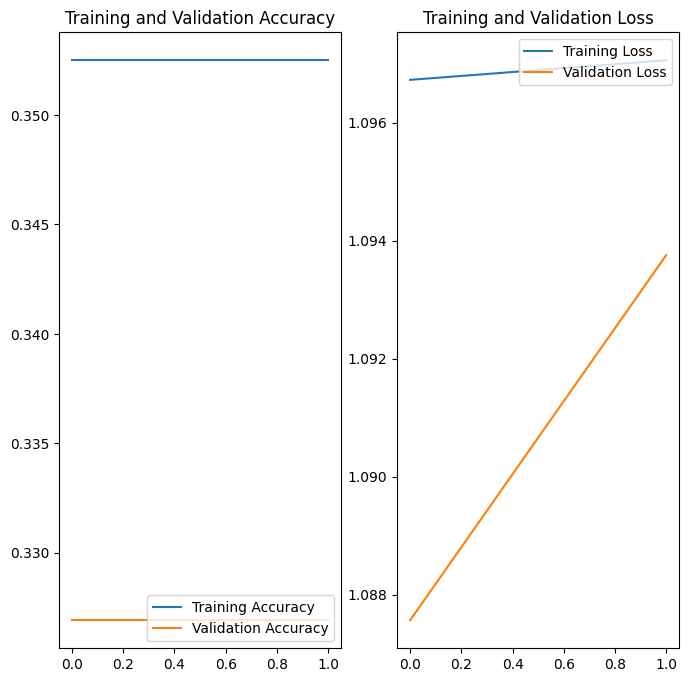

In [ ]:
# train_loss_array,train_acc_array,val_loss_array,val_acc_array
acc = train_acc_list
val_acc = test_acc_list

loss = train_loss_list
val_loss = test_loss_list
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 模型验证集预测

In [ ]:
predict_list = []
label_list = []
predict_pro_list = []
m_softmax = nn.Softmax(dim=1)
for (img_rgb, y) in test_dl:
    img_rgb = img_rgb.to(device)
    y = y.to(device)

    predict_score = rnn_model(img_rgb)
    predict_pro = m_softmax(predict_score)

    predict_label = np.argmax(predict_score.detach().cpu().numpy(),axis=1)

    predict_pro_list.append(predict_pro.detach().cpu().numpy())
    predict_list.append(predict_label)
    label_list.append(y.detach().cpu().numpy())

predict_pro_array = np.vstack(predict_pro_list)[:,1]
predict_array = np.hstack(predict_list)
label_array = np.hstack(label_list)
predict_pro_array[:5],predict_array[:5],label_array[:5]

(array([0.3471844, 0.3471844, 0.3471844, 0.3471844, 0.3471844],
       dtype=float32),
 array([1, 1, 1, 1, 1]),
 array([2, 2, 1, 1, 2]))

### 分类报告

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_array, predict_array,digits=3))

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        12
           1      0.327     1.000     0.493        17
           2      0.000     0.000     0.000        23

    accuracy                          0.327        52
   macro avg      0.109     0.333     0.164        52
weighted avg      0.107     0.327     0.161        52



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 混淆矩阵

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(label_array, predict_array)
cnf_matrix

array([[ 0, 12,  0],
       [ 0, 17,  0],
       [ 0, 23,  0]])

<Axes: >

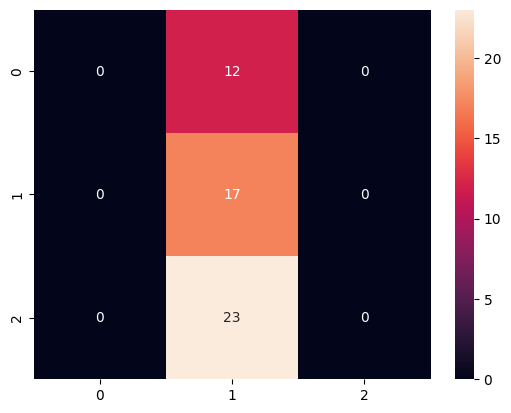

In [ ]:
sns.heatmap(cnf_matrix, annot=True, fmt='g')

<Axes: >

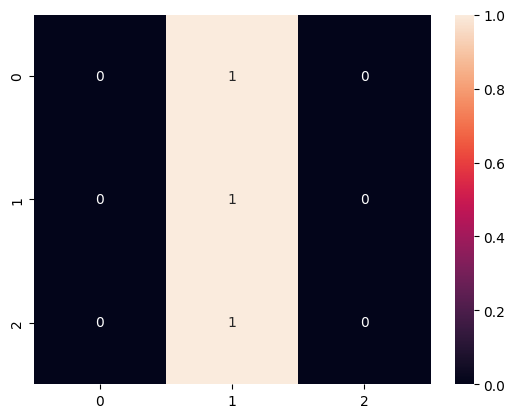

In [ ]:
cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.3g')

# resnet 模型

## 构建模型

In [ ]:
class resnetModel(nn.Module):
    def __init__(self, num_classes, num_lstm_layers = 2, backbone_name = 'resnet18'):
        super().__init__()
        self.backbone = timm.create_model(backbone_name, pretrained = True, features_only = True)
        self.adap = nn.AdaptiveAvgPool2d((2,2))

        # self.lstm = nn.LSTM(512, hidden_size, num_lstm_layers, batch_first = True)
        self.lin = nn.Linear(2560,100)
        self.fc = nn.Linear(100, num_classes)

    def forward(self, x):
        'x: batch, num_frames, channels, height, width'
        batch, num_frames, channels, height, width = x.shape

        # x: batch * num_frames, channels, height, width
        x = torch.reshape(x, (-1, *x.shape[2:]))
        # print(x.shape)

        x1,x2,x3,x4,x5 = self.backbone(x)
        # print(x1.shape,x2.shape,x3.shape,x4.shape,x5.shape)

        # x: batch * num_frames, 512, 2, 2
        x = self.adap(x3)

        # x: batch * num_frames, 2048
        # x = nn.Flatten()(x)

        # # x: batch, num_frames, features vector
        x = torch.reshape(x, (batch, -1))

        # # x: Tensor kích thước (batch_size, sequence_length, hidden_size)
        # # h_n: Hidden state cuối cùng của lớp cuối cùng, kích thước (num_layers, batch_size, hidden_size)
        # # c_n: Cell state cuối cùng của lớp cuối cùng, kích thước (num_layers, batch_size, hidden_size)
        # x, (h_n, c_n) = self.lstm(x)

        # x = h_n[-1, ...]
        x = self.lin(x)
        x = self.fc(x)

        return x

resnet_model = resnetModel(3,100).to(device)
resnet_model(b_x.to(device)).shape

torch.Size([4, 3])

## 分配损失函数和优化器

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet_model.parameters(), lr=1e-3)

## 训练和评估

In [ ]:
epochs = 2
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dl, resnet_model, loss_fn, optimizer)

    train_loss, train_correct = test(train_dl, resnet_model, loss_fn)
    test_loss, test_correct = test(test_dl, resnet_model, loss_fn)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_correct)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_correct)
print("Done!")

Epoch 1
-------------------------------
loss: 1.092849  [    0/  400]
loss: 1.539510  [   40/  400]
loss: 1.107131  [   80/  400]
loss: 3.100456  [  120/  400]
loss: 0.973885  [  160/  400]
loss: 0.034777  [  200/  400]
loss: 0.687504  [  240/  400]
loss: 0.987925  [  280/  400]
loss: 0.699345  [  320/  400]
loss: 0.064457  [  360/  400]
Test Error: 
 Accuracy: 97.8%, Avg loss: 0.066871 

Test Error: 
 Accuracy: 94.2%, Avg loss: 0.074269 

Epoch 2
-------------------------------
loss: 0.002514  [    0/  400]
loss: 0.215968  [   40/  400]
loss: 0.000758  [   80/  400]
loss: 0.020862  [  120/  400]
loss: 0.452038  [  160/  400]
loss: 0.013003  [  200/  400]
loss: 0.045537  [  240/  400]
loss: 0.002928  [  280/  400]
loss: 0.004595  [  320/  400]
loss: 0.006377  [  360/  400]
Test Error: 
 Accuracy: 99.5%, Avg loss: 0.020131 

Test Error: 
 Accuracy: 100.0%, Avg loss: 0.006372 

Done!


## 可视化训练过程

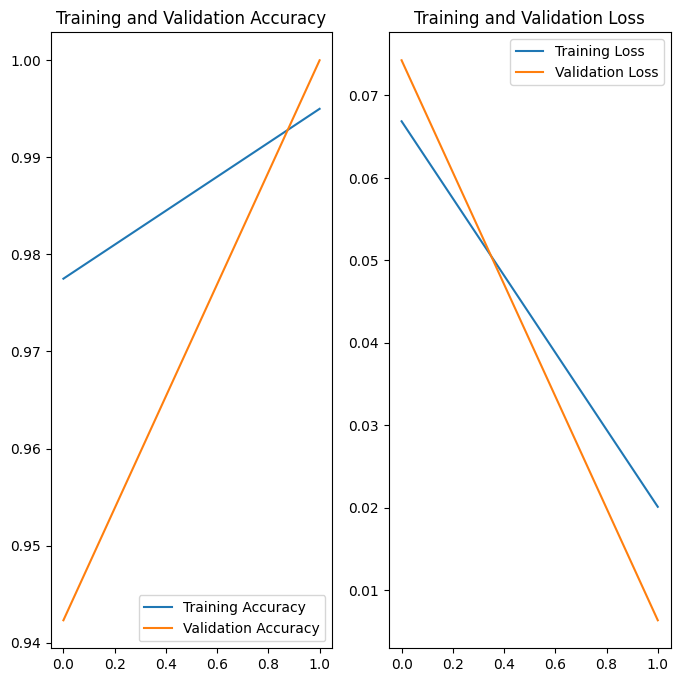

In [ ]:
# train_loss_array,train_acc_array,val_loss_array,val_acc_array
acc = train_acc_list
val_acc = test_acc_list

loss = train_loss_list
val_loss = test_loss_list
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 模型验证集预测

In [ ]:
predict_list = []
label_list = []
predict_pro_list = []
m_softmax = nn.Softmax(dim=1)
for (img_rgb, y) in test_dl:
    img_rgb = img_rgb.to(device)
    y = y.to(device)

    predict_score = resnet_model(img_rgb)
    predict_pro = m_softmax(predict_score)

    predict_label = np.argmax(predict_score.detach().cpu().numpy(),axis=1)

    predict_pro_list.append(predict_pro.detach().cpu().numpy())
    predict_list.append(predict_label)
    label_list.append(y.detach().cpu().numpy())

predict_pro_array = np.vstack(predict_pro_list)[:,1]
predict_array = np.hstack(predict_list)
label_array = np.hstack(label_list)
predict_pro_array[:5],predict_array[:5],label_array[:5]

(array([9.9942374e-01, 2.6134339e-07, 1.9217301e-03, 1.1708064e-01,
        5.5714492e-03], dtype=float32),
 array([1, 2, 0, 0, 0]),
 array([1, 2, 0, 0, 0]))

### 分类报告

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_array, predict_array,digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      1.000     1.000     1.000        17
           2      1.000     1.000     1.000        23

    accuracy                          1.000        52
   macro avg      1.000     1.000     1.000        52
weighted avg      1.000     1.000     1.000        52



### 混淆矩阵

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(label_array, predict_array)
cnf_matrix

array([[12,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 23]])

<Axes: >

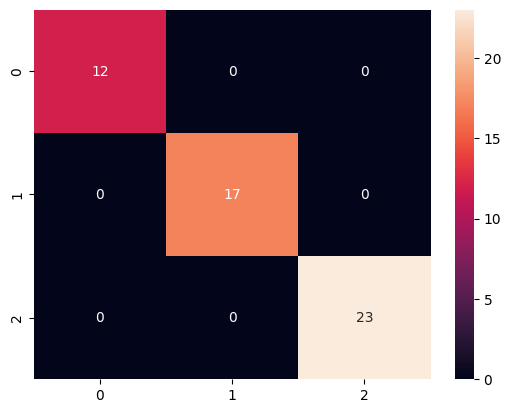

In [ ]:
sns.heatmap(cnf_matrix, annot=True, fmt='g')

<Axes: >

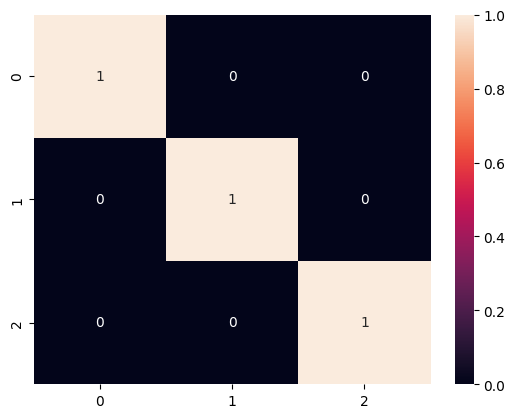

In [ ]:
cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.3g')

# vit 模型

## 构建模型

In [ ]:
class vitModel(nn.Module):
    def __init__(self, num_classes, num_lstm_layers = 2, backbone_name = 'vit_base_patch16_224'):
        super().__init__()
        self.base_model_vit_b_16 = models.vit_b_16(pretrained=True)

        self.base_model_vit_b_16.heads[0] = nn.Linear(768, 100)

        self.lin = nn.Linear(500, num_classes)
    def forward(self, x):
        'x: batch, num_frames, channels, height, width'
        batch, num_frames, channels, height, width = x.shape

        # x: batch * num_frames, channels, height, width
        x = torch.reshape(x, (-1, *x.shape[2:]))
        # print(x.shape)

        # x = F.interpolate(x, size=(224, 224), mode='bilinear', align_corners=False)
        # print(x.shape)
        x = self.base_model_vit_b_16(x)
        x = torch.reshape(x, (batch, -1))
        x = self.lin(x)
        return x

vit_model = vitModel(3,100).to(device)
vit_model(b_x.to(device)).shape

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([4, 3])

## 分配损失函数和优化器

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vit_model.parameters(), lr=1e-3)

## 训练和评估

In [ ]:
epochs = 2
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dl, vit_model, loss_fn, optimizer)

    train_loss, train_correct = test(train_dl, vit_model, loss_fn)
    test_loss, test_correct = test(test_dl, vit_model, loss_fn)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_correct)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_correct)
print("Done!")

Epoch 1
-------------------------------
loss: 1.068367  [    0/  400]
loss: 1.374783  [   40/  400]
loss: 1.051003  [   80/  400]
loss: 1.258429  [  120/  400]
loss: 1.456023  [  160/  400]
loss: 1.059495  [  200/  400]
loss: 1.076643  [  240/  400]
loss: 1.130661  [  280/  400]
loss: 1.254324  [  320/  400]
loss: 1.046904  [  360/  400]
Test Error: 
 Accuracy: 42.5%, Avg loss: 1.072969 

Test Error: 
 Accuracy: 53.8%, Avg loss: 1.023109 

Epoch 2
-------------------------------
loss: 1.192186  [    0/  400]
loss: 1.164653  [   40/  400]
loss: 0.956792  [   80/  400]
loss: 1.046261  [  120/  400]
loss: 1.367487  [  160/  400]
loss: 1.054778  [  200/  400]
loss: 1.082904  [  240/  400]
loss: 1.224728  [  280/  400]
loss: 1.068398  [  320/  400]
loss: 1.050281  [  360/  400]
Test Error: 
 Accuracy: 35.2%, Avg loss: 1.100791 

Test Error: 
 Accuracy: 32.7%, Avg loss: 1.112854 

Done!


## 可视化训练过程

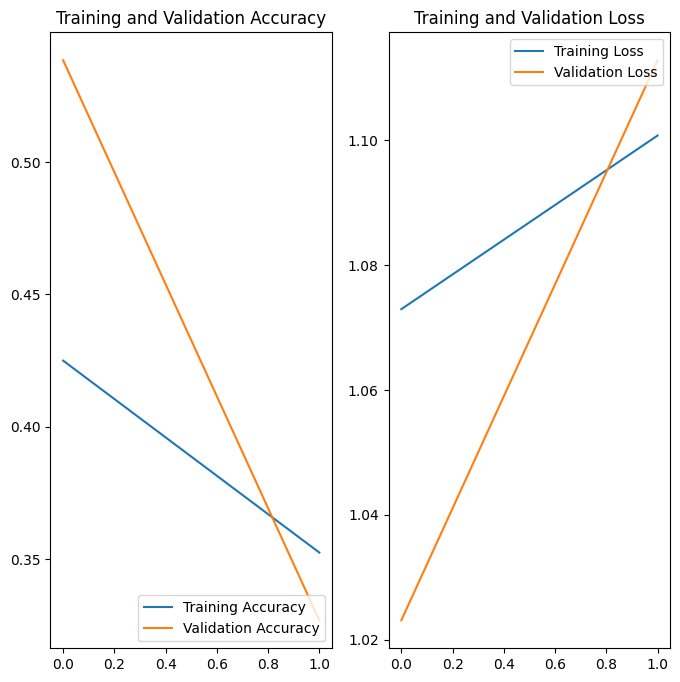

In [ ]:
# train_loss_array,train_acc_array,val_loss_array,val_acc_array
acc = train_acc_list
val_acc = test_acc_list

loss = train_loss_list
val_loss = test_loss_list
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 模型验证集预测

In [ ]:
predict_list = []
label_list = []
predict_pro_list = []
m_softmax = nn.Softmax(dim=1)
for (img_rgb, y) in test_dl:
    img_rgb = img_rgb.to(device)
    y = y.to(device)

    predict_score = vit_model(img_rgb)
    predict_pro = m_softmax(predict_score)

    predict_label = np.argmax(predict_score.detach().cpu().numpy(),axis=1)

    predict_pro_list.append(predict_pro.detach().cpu().numpy())
    predict_list.append(predict_label)
    label_list.append(y.detach().cpu().numpy())

predict_pro_array = np.vstack(predict_pro_list)[:,1]
predict_array = np.hstack(predict_list)
label_array = np.hstack(label_list)
predict_pro_array[:5],predict_array[:5],label_array[:5]

(array([0.45905742, 0.42172056, 0.4020087 , 0.4391348 , 0.4665238 ],
       dtype=float32),
 array([1, 1, 1, 1, 1]),
 array([2, 0, 0, 2, 1]))

### 分类报告

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_array, predict_array,digits=3))

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        12
           1      0.327     1.000     0.493        17
           2      0.000     0.000     0.000        23

    accuracy                          0.327        52
   macro avg      0.109     0.333     0.164        52
weighted avg      0.107     0.327     0.161        52



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 混淆矩阵

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(label_array, predict_array)
cnf_matrix

array([[ 0, 12,  0],
       [ 0, 17,  0],
       [ 0, 23,  0]])

<Axes: >

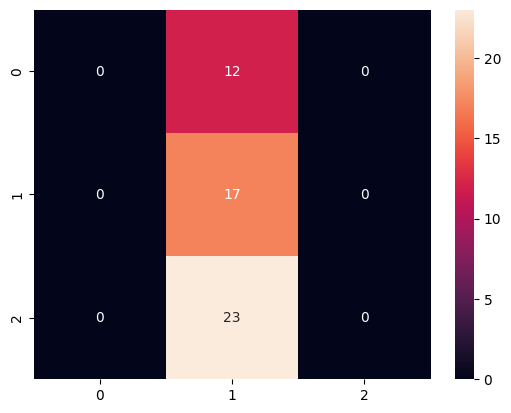

In [ ]:
sns.heatmap(cnf_matrix, annot=True, fmt='g')

<Axes: >

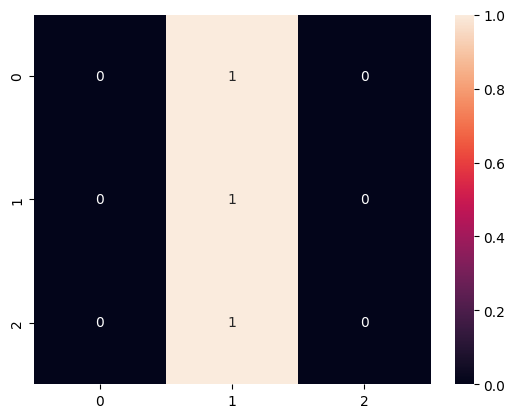

In [ ]:
cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.3g')

# vit  + resnet 模型

## 构建基础模型 resnet

In [ ]:

base_model_resnet18 = models.resnet18(pretrained=True)
num_ftrs = base_model_resnet18.fc.in_features
base_model_resnet18.fc = nn.Linear(num_ftrs, 100)

base_model_resnet18.to(device)(one_data_eg.to(device)).shape

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([2, 100])

## 构建基础模型 transformer

In [ ]:

base_model_vit_b_32 = models.vit_b_32(pretrained=True)
# base_model_vit_b_16.encoder.layers = base_model_vit_b_16.encoder.layers[:2]
base_model_vit_b_32.heads.head = nn.Linear(768, 100)

base_model_vit_b_32.to(device)(one_data_eg.to(device)).shape

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_32_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_32_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([2, 100])

## 合并得到大模型

In [ ]:
class ModeleBig(nn.Module):
    def __init__(self):
        super().__init__()

        self.base_model1 = base_model_vit_b_32
        self.base_model2 = base_model_resnet18

        encoder_layer = nn.TransformerEncoderLayer(d_model=100, nhead=2)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=2)
        self.fc1 = nn.Linear(200, 50)
        # self.fc2 = nn.Linear(50, num_classes)
        self.flatten = nn.Flatten()


    def forward(self, img_rgb):
        # 模型一提取特征
        rgb_tensor1 = self.base_model1(img_rgb)

        # 模型二提取特征
        rgb_tensor2 = self.base_model2(img_rgb)


        # 合并特征并用Transformer encoder
        x = torch.stack([rgb_tensor1,rgb_tensor2],dim=1)
        x = self.transformer_encoder(x)
        x = self.flatten(x)

        x = self.fc1(x)
        # x = self.fc2(x)
        return x

model_big = ModeleBig().to(device)
model_big(one_data_eg.to(device)).shape

torch.Size([2, 50])

## 构建模型

In [ ]:
class vitResModel(nn.Module):
    def __init__(self, num_classes, num_lstm_layers = 2, backbone_name = 'vit_base_patch16_224'):
        super().__init__()
        self.model_big = model_big
        self.lin = nn.Linear(250, num_classes)
    def forward(self, x):
        'x: batch, num_frames, channels, height, width'
        batch, num_frames, channels, height, width = x.shape

        # x: batch * num_frames, channels, height, width
        x = torch.reshape(x, (-1, *x.shape[2:]))
        # print(x.shape)

        # x = F.interpolate(x, size=(224, 224), mode='bilinear', align_corners=False)
        # print(x.shape)
        x = self.model_big(x)
        x = torch.reshape(x, (batch, -1))
        x = self.lin(x)
        return x

vit_resnet_model = vitResModel(3,100).to(device)
vit_resnet_model(b_x.to(device)).shape

torch.Size([4, 3])

## 分配损失函数和优化器

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vit_resnet_model.parameters(), lr=1e-3)

## 训练和评估

In [ ]:
epochs = 2
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dl, vit_resnet_model, loss_fn, optimizer)

    train_loss, train_correct = test(train_dl, vit_resnet_model, loss_fn)
    test_loss, test_correct = test(test_dl, vit_resnet_model, loss_fn)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_correct)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_correct)
print("Done!")

Epoch 1
-------------------------------
loss: 1.131844  [    0/  400]
loss: 0.999580  [   40/  400]
loss: 0.506683  [   80/  400]
loss: 0.517568  [  120/  400]
loss: 1.332392  [  160/  400]
loss: 0.791329  [  200/  400]
loss: 0.467080  [  240/  400]
loss: 1.149899  [  280/  400]
loss: 0.221964  [  320/  400]
loss: 0.841634  [  360/  400]
Test Error: 
 Accuracy: 67.8%, Avg loss: 1.023632 

Test Error: 
 Accuracy: 78.8%, Avg loss: 0.680288 

Epoch 2
-------------------------------
loss: 1.111379  [    0/  400]
loss: 0.606898  [   40/  400]
loss: 0.925281  [   80/  400]
loss: 1.739831  [  120/  400]
loss: 0.575202  [  160/  400]
loss: 0.922926  [  200/  400]
loss: 0.744597  [  240/  400]
loss: 0.565074  [  280/  400]
loss: 0.629685  [  320/  400]
loss: 0.912897  [  360/  400]
Test Error: 
 Accuracy: 78.5%, Avg loss: 0.645834 

Test Error: 
 Accuracy: 84.6%, Avg loss: 0.501511 

Done!


## 可视化训练过程

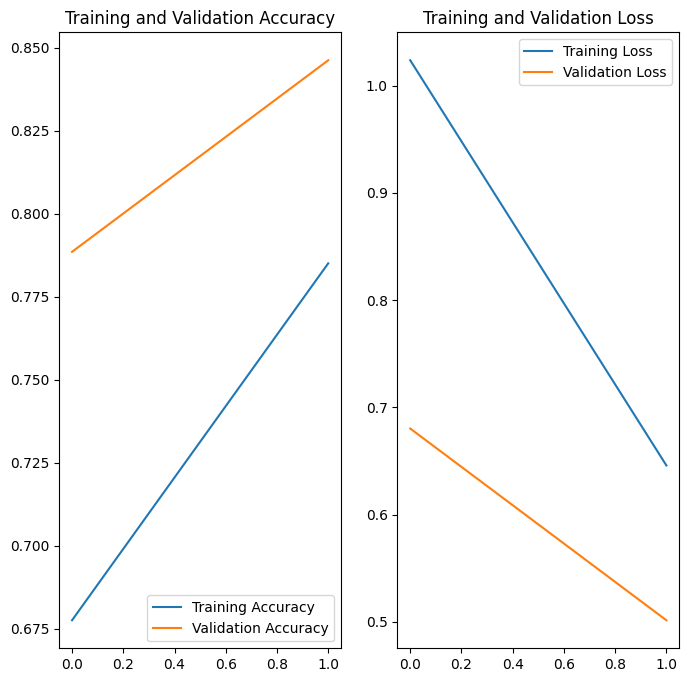

In [ ]:
# train_loss_array,train_acc_array,val_loss_array,val_acc_array
acc = train_acc_list
val_acc = test_acc_list

loss = train_loss_list
val_loss = test_loss_list
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 模型验证集预测

In [ ]:
predict_list = []
label_list = []
predict_pro_list = []
m_softmax = nn.Softmax(dim=1)
for (img_rgb, y) in test_dl:
    img_rgb = img_rgb.to(device)
    y = y.to(device)

    predict_score = vit_resnet_model(img_rgb)
    predict_pro = m_softmax(predict_score)

    predict_label = np.argmax(predict_score.detach().cpu().numpy(),axis=1)

    predict_pro_list.append(predict_pro.detach().cpu().numpy())
    predict_list.append(predict_label)
    label_list.append(y.detach().cpu().numpy())

predict_pro_array = np.vstack(predict_pro_list)[:,1]
predict_array = np.hstack(predict_list)
label_array = np.hstack(label_list)
predict_pro_array[:5],predict_array[:5],label_array[:5]

(array([0.02079255, 0.7628358 , 0.13309038, 0.05825408, 0.21992634],
       dtype=float32),
 array([2, 1, 2, 0, 2]),
 array([2, 0, 2, 0, 0]))

### 分类报告

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_array, predict_array,digits=3))

              precision    recall  f1-score   support

           0      0.875     0.583     0.700        12
           1      0.889     0.941     0.914        17
           2      0.846     0.957     0.898        23

    accuracy                          0.865        52
   macro avg      0.870     0.827     0.837        52
weighted avg      0.867     0.865     0.858        52



### 混淆矩阵

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(label_array, predict_array)
cnf_matrix

array([[ 7,  2,  3],
       [ 0, 16,  1],
       [ 1,  0, 22]])

<Axes: >

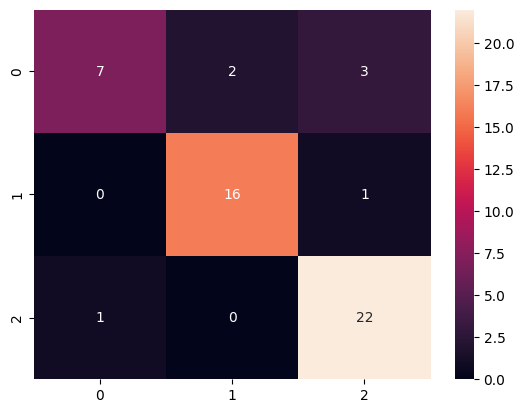

In [ ]:
sns.heatmap(cnf_matrix, annot=True, fmt='g')

<Axes: >

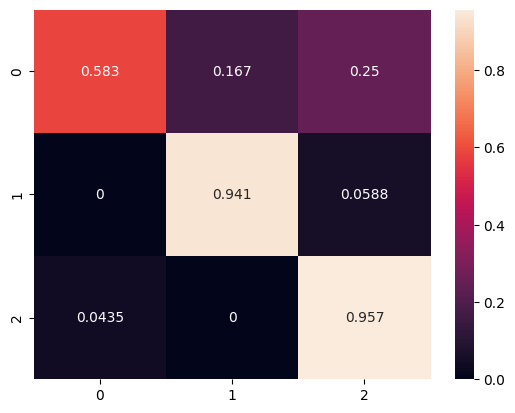

In [ ]:
cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.3g')

# resnet + lstm 模型

## 构建模型

In [ ]:
class ClassificationModel(nn.Module):
    def __init__(self, num_classes, hidden_size, num_lstm_layers = 2, backbone_name = 'resnet18'):
        super().__init__()
        self.backbone = timm.create_model(backbone_name, pretrained = True, features_only = True)
        self.adap = nn.AdaptiveAvgPool2d((2,2))

        self.lstm = nn.LSTM(512, hidden_size, num_lstm_layers, batch_first = True)

        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        'x: batch, num_frames, channels, height, width'
        batch, num_frames, channels, height, width = x.shape

        # x: batch * num_frames, channels, height, width
        x = torch.reshape(x, (-1, *x.shape[2:]))

        x1,x2,x3,x4,x5 = self.backbone(x)

        # x: batch * num_frames, 512, 2, 2
        x = self.adap(x3)

        # x: batch * num_frames, 2048
        x = nn.Flatten()(x)

        # x: batch, num_frames, features vector
        x = torch.reshape(x, (batch, num_frames, -1))

        # x: Tensor kích thước (batch_size, sequence_length, hidden_size)
        # h_n: Hidden state cuối cùng của lớp cuối cùng, kích thước (num_layers, batch_size, hidden_size)
        # c_n: Cell state cuối cùng của lớp cuối cùng, kích thước (num_layers, batch_size, hidden_size)
        x, (h_n, c_n) = self.lstm(x)

        x = h_n[-1, ...]

        x = self.fc(x)

        return x

resnet_lstm_model = ClassificationModel(3,2).to(device)
resnet_lstm_model(b_x.to(device)).shape

torch.Size([4, 3])

## 分配损失函数和优化器

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet_lstm_model.parameters(), lr=1e-3)

## 训练和评估

In [ ]:
epochs = 2
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dl, resnet_lstm_model, loss_fn, optimizer)

    train_loss, train_correct = test(train_dl, resnet_lstm_model, loss_fn)
    test_loss, test_correct = test(test_dl, resnet_lstm_model, loss_fn)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_correct)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_correct)
print("Done!")

Epoch 1
-------------------------------
loss: 1.266800  [    0/  400]
loss: 1.082886  [   40/  400]
loss: 1.358344  [   80/  400]
loss: 1.115008  [  120/  400]
loss: 1.225598  [  160/  400]
loss: 1.096474  [  200/  400]
loss: 1.117706  [  240/  400]
loss: 0.999265  [  280/  400]
loss: 1.352247  [  320/  400]
loss: 0.966923  [  360/  400]
Test Error: 
 Accuracy: 34.2%, Avg loss: 1.146774 

Test Error: 
 Accuracy: 44.2%, Avg loss: 1.050465 

Epoch 2
-------------------------------
loss: 1.381561  [    0/  400]
loss: 1.191855  [   40/  400]
loss: 1.115306  [   80/  400]
loss: 1.097158  [  120/  400]
loss: 1.405623  [  160/  400]
loss: 1.080137  [  200/  400]
loss: 1.034913  [  240/  400]
loss: 0.942108  [  280/  400]
loss: 1.153521  [  320/  400]
loss: 0.903209  [  360/  400]
Test Error: 
 Accuracy: 34.2%, Avg loss: 1.079565 

Test Error: 
 Accuracy: 44.2%, Avg loss: 1.008686 

Done!


## 可视化训练过程

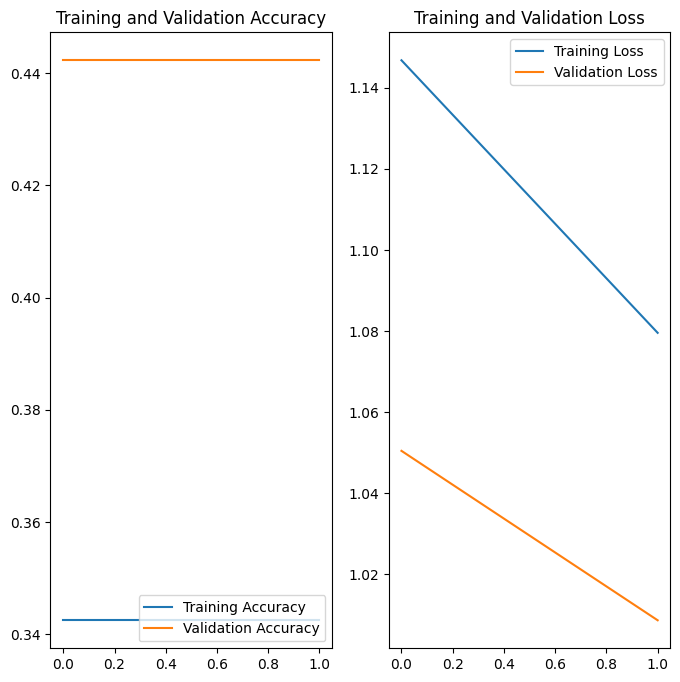

In [ ]:
# train_loss_array,train_acc_array,val_loss_array,val_acc_array
acc = train_acc_list
val_acc = test_acc_list

loss = train_loss_list
val_loss = test_loss_list
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 模型验证集预测

In [ ]:
predict_list = []
label_list = []
predict_pro_list = []
m_softmax = nn.Softmax(dim=1)
for (img_rgb, y) in test_dl:
    img_rgb = img_rgb.to(device)
    y = y.to(device)

    predict_score = resnet_lstm_model(img_rgb)
    predict_pro = m_softmax(predict_score)

    predict_label = np.argmax(predict_score.detach().cpu().numpy(),axis=1)

    predict_pro_list.append(predict_pro.detach().cpu().numpy())
    predict_list.append(predict_label)
    label_list.append(y.detach().cpu().numpy())

predict_pro_array = np.vstack(predict_pro_list)[:,1]
predict_array = np.hstack(predict_list)
label_array = np.hstack(label_list)
predict_pro_array[:5],predict_array[:5],label_array[:5]

(array([0.4158749 , 0.41582754, 0.4159495 , 0.38723126, 0.37710494],
       dtype=float32),
 array([2, 2, 2, 2, 2]),
 array([1, 1, 1, 2, 1]))

### 分类报告

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_array, predict_array,digits=3))

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        12
           1      0.000     0.000     0.000        17
           2      0.442     1.000     0.613        23

    accuracy                          0.442        52
   macro avg      0.147     0.333     0.204        52
weighted avg      0.196     0.442     0.271        52



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 混淆矩阵

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(label_array, predict_array)
cnf_matrix

array([[ 0,  0, 12],
       [ 0,  0, 17],
       [ 0,  0, 23]])

<Axes: >

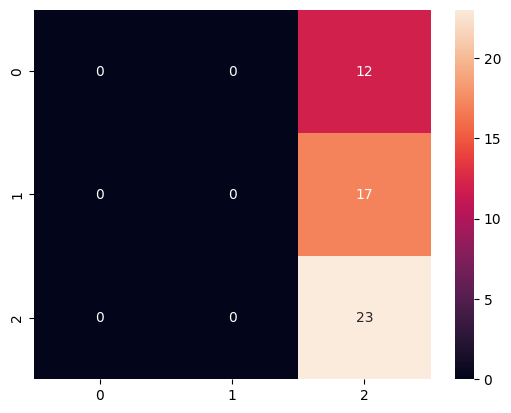

In [ ]:
sns.heatmap(cnf_matrix, annot=True, fmt='g')

<Axes: >

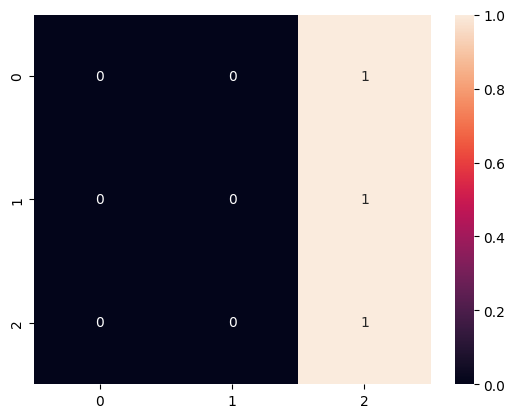

In [ ]:
cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.3g')